<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libreirie" data-toc-modified-id="Libreirie-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libreirie</a></span></li><li><span><a href="#Tiri-di-dado" data-toc-modified-id="Tiri-di-dado-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tiri di dado</a></span></li><li><span><a href="#Frequenze" data-toc-modified-id="Frequenze-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Frequenze</a></span></li><li><span><a href="#Istogramma" data-toc-modified-id="Istogramma-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Istogramma</a></span></li></ul></div>

# Realizzazione di un istogramma
Vogliamo visualizzare su un istogramma il numero di volte che un dado casca su ciascuna faccia.


In [1]:
# Da eseguire solo se necessara istallazione della libreria, in generale alla prima esecuzione
# Il punto esclamativo sulle celle di IPython (Jupyter Nb) esegue un comando sul Terminale

# !pip install matplotlib
# !pip install numpy
# !pip install seaborn

## Libreirie

In [6]:
# Le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate

# Aggiungiamo alle precedenti uan libreria di visualizzazione dinamica:
from matplotlib import animation



## Funzione `update()`

In [7]:
# scriviamo una funzione "update"

def update(frame_number, rolls, faces, frequencies):
    """
    Configura ciascuna bar per ciascun frame dell'animazione

    frame_number: parametro che richiama il numero del frame da usare in FuncAnimation. E' un paramentro richiesto ma non utilizzato in  update
    rolls: numero di lanci di dado per ogni frame dell'animazione
    faces: i valori delle facce del dado che verranno utilizzati per rappresentare sull'asse X
    frequencies: la lista nella quale riepiloghiamo le frequenza del dado

    """
    # Lancio il dado e aggiorno le frequenze:
    for i in range(rolls):
        frequencies[random.randrange(1,7) - 1] += 1

    plt.cla() # cancella il grafico attuale
    axes = sns.barplot(faces, frequencies, palette="bright")



In [10]:
number_of_frames = 600
rolls_per_frame = 10
sns.set_style("whitegrid")
figure = plt.figure("Rolling")
values = list(range(1,7))
frequencies = [0] * 6

<Figure size 432x288 with 0 Axes>

In [12]:
die_animation = animation.FuncAnimation(
    figure, update, repeat=False, frames = number_of_frames, interval= 33,
                                        fargs=(rolls_per_frame, values, frequencies))
plt.show()

## Frequenze
Per generare le frequenze con cui appaiono i singoli valori:
possimao usare due strade:
* Utiliziamo il metodo Counter della libreria collections: <br>
restituisce un dizionario con "tiro di dado" e "frequeza" come "chiave" e "valore":
> `collections.Counter(lista)`<br>

* Utiliziamo la funzione unique della libreria Numpy,costruita per cercare i valori unici di un iterabile
con il parametro "return_counts = True" restituisce anche le occorrenze di ciascun valore
Restituisce due liste rispettivamente con l'elenco degli elementi unici ordinati e il numero di occorrenze per ciascuno
di essi
> `np.unique(lista, retunr_counts = True)`

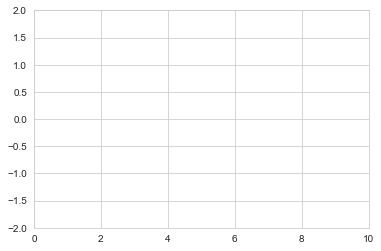

In [14]:
def basic_animation(frames=100, interval=30):
    """Plot a basic sine wave with oscillating amplitude"""
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
    line, = ax.plot([], [], lw=2)

    x = np.linspace(0, 10, 1000)

    def init():
        line.set_data([], [])
        return line,

    def animate(i):
        y = np.cos(i * 0.02 * np.pi) * np.sin(x - i * 0.02 * np.pi)
        line.set_data(x, y)
        return line,

    return animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval) 
basic_animation()

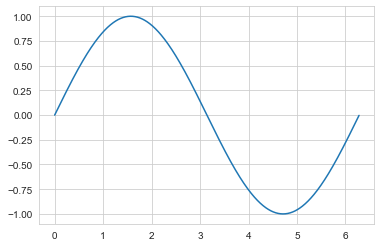

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111)

x = np.arange(0, 2 * np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i / 10))
    return line,
# note: no anim=animation.FuncAnimation(...) assignment
anim  = animation.FuncAnimation(fig, animate)
plt.show()

In [7]:
%%time

valori, frequenza = np.unique(tiri, return_counts=True)

Wall time: 0 ns


Osserviamo che nonostante le aspettative fossero diverse, la funzione Counter e' piu'
veloce, probabilmente perche' non esegue l'ordinamento dei valori.<br>
Ovviamente i risultato sono identici:

In [8]:
# Diamo un'occhiata ai risultati:
print("Da np.unique otteniamo:")
for val, freq in zip(valori, frequenza):
    print(f"Il numero {val} e' uscito {freq} volte")

Da np.unique otteniamo:
Il numero 1 e' uscito 115 volte
Il numero 2 e' uscito 89 volte
Il numero 3 e' uscito 96 volte
Il numero 4 e' uscito 95 volte
Il numero 5 e' uscito 110 volte
Il numero 6 e' uscito 95 volte


## Istogramma
Per la visualizzazione dell'istogramma utilizzeremo la libreria Seaborn, costruita a partire da
MatplotLib.

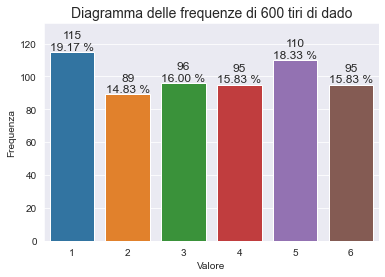

In [9]:
# imposto lo stile con sfondo grgietto
sns.set_style("darkgrid")

# scrivo la stringa che contiene il titolo
title = f"Diagramma delle frequenze di {len(tiri)} tiri di dado"
# creo l'oggetto axes, il digramma vero e proprio
axes = sns.barplot(x=valori, y=frequenza)

# metto su axes il titolo
axes.set_title(title, fontsize = 14)

# metto le etichette sull'asse x e sull'asse y
axes.set(xlabel = "Valore", ylabel = "Frequenza" )

# alzo il limite massimo sull'asse y per farci stare alcune informazioni sulla
axes.set_ylim(top = max(frequenza) * 1.15)

# per ciascun rettangolo (axes.patches) e ciascuna frequenza ad esso associata (frequenza_bar) nel diagramma (axes):
for bar, frequenza_bar in  zip(axes.patches, frequenza):
    # recupera la posizione x del centro del rettangolo
    x_text = bar.get_x() + bar.get_width()/2
    # bar.get_x() e' il punto in basso a sinistra del diagramma
    # a cui sommo mezza larghezza della barra
    # recupero la posizione y del testo, ovvero sopra alla barra:
    y_text = bar.get_y() + bar.get_height()
    # bar.get_y() e' il punto piu' basso del rettangolo, a cui sommo l'altezza del rettangolo stesso "bar.get_height()"

    # Il testo da scrivere sopra a ciascuna barra e' il numero di occorrenza (che ricavvo da "get_height")
    # e la percentuale (che ricavo, dal get_height, diviso per il numero dei tiri, in percentuale:
    text = f"{bar.get_height():.0f}\n{100*bar.get_height()/len(tiri):.2f} %"

    # Stampa sul diagramma il testo (axes.text(...))
    axes.text(x_text, y_text, text,
             ha = "center", # allinea il testo al centro orizzontalmente
             va = "bottom", # allinea il testo in basso verticalmente
             fontsize = 12  # imposto le dimensioni del carattere del text
             )

# mostra il diaramma a video (necessario su configurazioni non IPython)
plt.show()

In [10]:
# Salvo con un magic command di IPython (Jupyter) le celle dalla 1 alla 5 nel file diagramma.py

%save diagramma.py 1-9

The following commands were written to file `diagramma.py`:
# Da eseguire solo se necessara istallazione della libreria, in generale alla prima esecuzione
# Il punto esclamativo sulle celle di IPython (Jupyter Nb) esegue un comando sul Terminale

# !pip install matplotlib
# !pip install numpy
# !pip install seaborn
# Le librerie standard di python che ci serviranno in questo progetto:
import random
import collections

# Le librerie dei framework specifici:
import matplotlib.pyplot as plt # Motore grafico di python per realizzare diagrammi e fuznoni
import numpy as np # Libreria che gestisce ad altissima efficienza gli array
import seaborn as sns # Libreria che usa il motore grafico di MatplotLib con funzionalita' grafiche avanzate
# Tiriamo un dado "n" volte e salviamo i risultati in una lista

n_tiri = 600
# Usiamo la list_comprehension per costruire una lista
# di numeri casuali lunga n_tiri:
# tiri = [genera un numero casuale per j che va da 0 al numero di tiri]
tiri = [random.randr